<a href="https://colab.research.google.com/github/Saifullah785/intro-to-ml-with-python-notes-practice/blob/main/Chapter_02_Supervised_Learning/Chapter_02_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.9 MB/s eta 0:00:00


# **Supervised Learning**

**Classification and Regression**

**Generalization, Overfitting and Underfitting**

**Relation of Model Complexity to Dataset Size**

# **Supervised Machine Learning Algorithms**

**Some Sample Datasets**

X.shape: (26, 2)


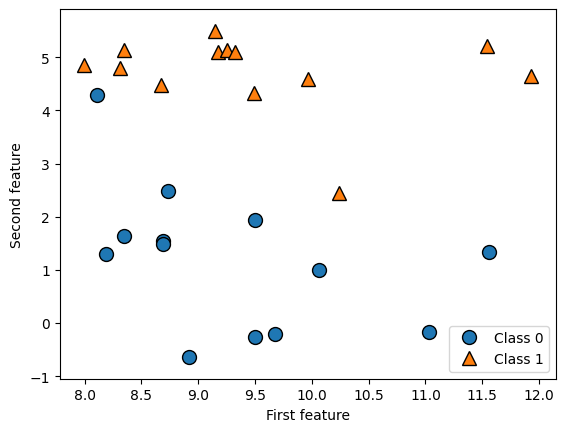

In [2]:
# Generate dataset

X, y = mglearn.datasets.make_forge()

# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape:",X.shape)

Text(0, 0.5, 'Target')

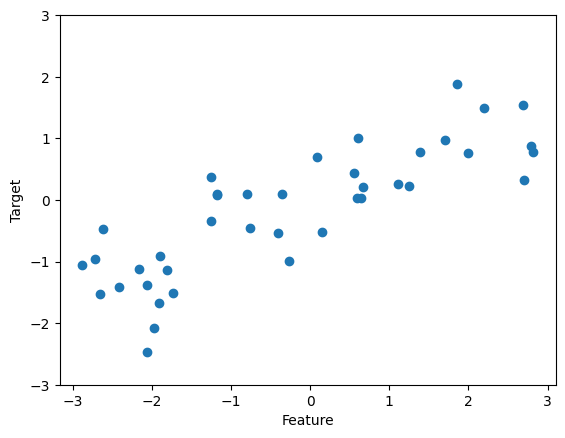

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys():\n", cancer.keys())
print("Shape of cancer data:", cancer.data.shape)
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Shape of cancer data: (569, 30)
Sample counts per class:
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [44]:
# Not used in this notebook, but an example of another dataset.
# from sklearn.datasets import load_boston
# boston = load_boston()
# print("Data shape:", boston.data.shape)

In [5]:
# Print sample counts per class
print('Sample counts per class:\n',{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {np.str_('malignant'): np.int64(212), np.str_('benign'): np.int64(357)}


In [6]:
# Print feature names
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [7]:
# Example of loading the boston dataset (commented out)
# from sklearn.datasets import load_boston
# boston = load_boston()
# print("Data shape:", boston.data.shape)

In [8]:
X, y = mglearn.datasets.load_extended_boston()
# df.head() # Removed as load_extended_boston returns a tuple, not a DataFrame with .head()
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (506, 104)
Shape of y: (506,)


#**K - Nearest Neighbors**

**k - Neighbors classification**

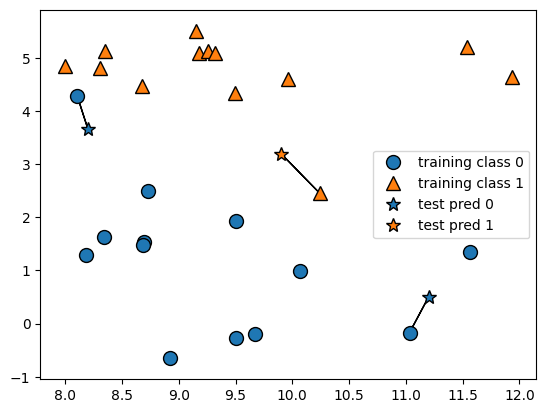

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

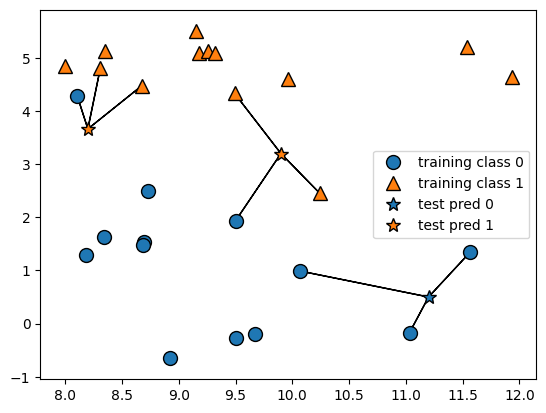

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [11]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate KNeighborsClassifier with 3 neighbors
clf = KNeighborsClassifier(n_neighbors=3)

In [13]:
# Fit the classifier to the training data
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
# Make predictions on the test set
print('Test set predictions:', clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [15]:
# Evaluate the classifier on the test set
print('Test set accuracy: {:.2f}'.format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


# **Analyzing KNeighborsClassifier**

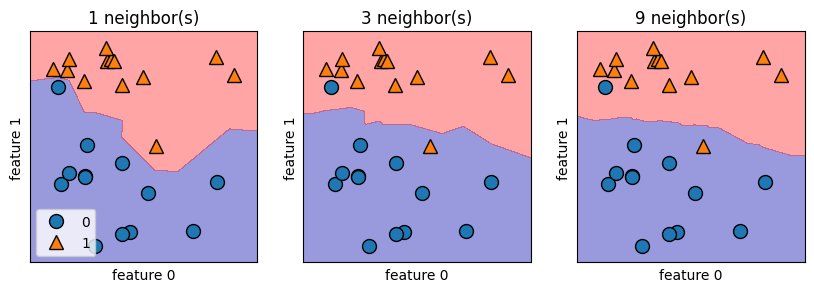

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)

    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))

    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)


In [17]:
# Load the breast cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [18]:
# Split breast cancer data into training and test sets, stratifying by target
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [19]:
# Initialize lists to store training and test accuracies
training_accuracy = []
test_accuracy = []

# Define the range of n_neighbors to explore
neighbors_settings = range(1, 11)

# Loop through different values of n_neighbors
for n_neighbors in neighbors_settings:
    # Build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    # Fit the model
    clf.fit(X_train, y_train)

    # Record training and test set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

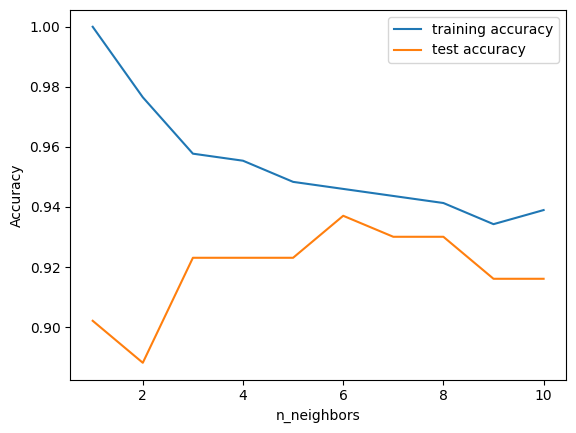

In [20]:
# Plot training and test accuracy for different n_neighbors
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# **K-neighbors regression**

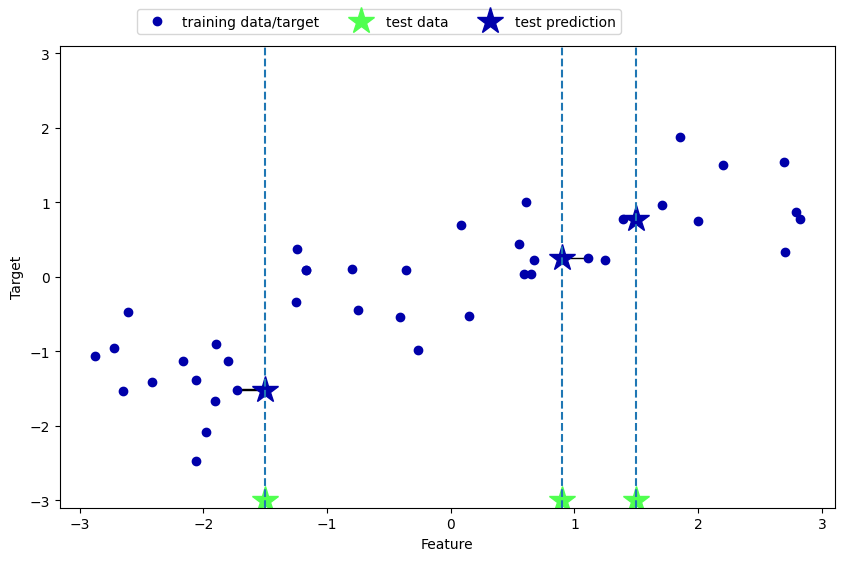

In [21]:
# Plot k-NN regression with 1 neighbor
mglearn.plots.plot_knn_regression(n_neighbors=1)

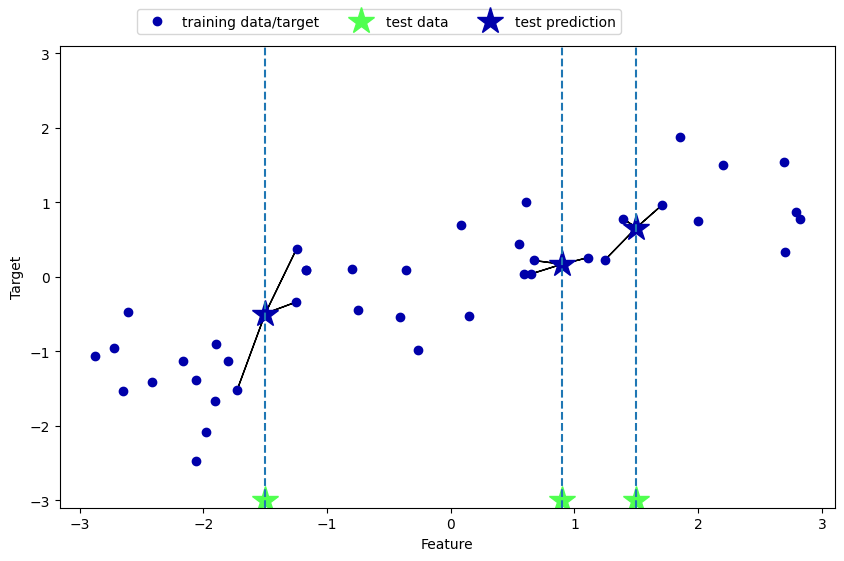

In [22]:
# Plot k-NN regression with 3 neighbors
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Generate the wave dataset
X, y = mglearn.datasets.make_wave(n_samples=40)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [24]:
# Instantiate KNeighborsRegressor with 3 neighbors
reg = KNeighborsRegressor(n_neighbors=3)
# Fit the model to the training data
reg.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [25]:
# Make predictions on the test set
print('Test set predictions:\n', reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [26]:
# Evaluate the regressor on the test set using R^2 score
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.83


# **Analyzing KNeighborsRegressor**

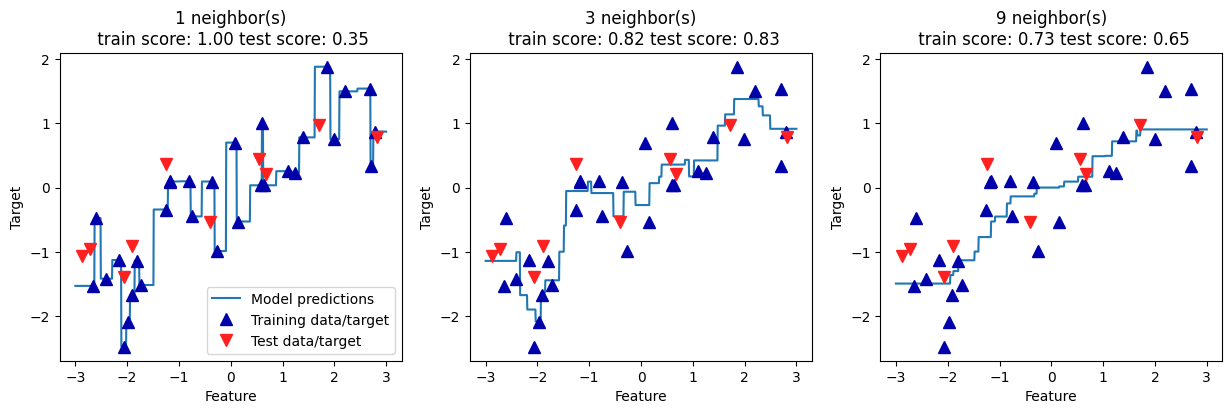

In [49]:
# Analyze KNeighborsRegressor with different numbers of neighbors
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Create a line of data points to predict on (using the wave dataset range)
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

# Generate the wave dataset again within this cell
X_wave, y_wave = mglearn.datasets.make_wave(n_samples=40)

# Split the wave dataset into training and test sets
X_train_wave, X_test_wave, y_train_wave, y_test_wave = train_test_split(X_wave, y_wave, random_state=0)

# Iterate through different numbers of neighbors
for n_neighbors, ax in zip([1, 3, 9], axes):
    # Instantiate and fit the regressor (using the wave dataset)
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train_wave, y_train_wave)

    # Plot the model's predictions on the wave dataset range
    ax.plot(line, reg.predict(line))
    # Plot the training data (from the wave dataset)
    ax.plot(X_train_wave, y_train_wave, '^', c=mglearn.cm2(0), markersize=8)

    # Plot the test data (from the wave dataset)
    ax.plot(X_test_wave, y_test_wave, 'v', c=mglearn.cm2(1), markersize=8)

    # Set the title with number of neighbors and scores
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train_wave, y_train_wave),
            reg.score(X_test_wave, y_test_wave)))
    # Set axis labels
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
# Add legend to the first subplot
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

Strengths, weakness, and parameters


# **Linear Models**


**Linear models for regression**

w[0]: 0.393906  b: -0.031804


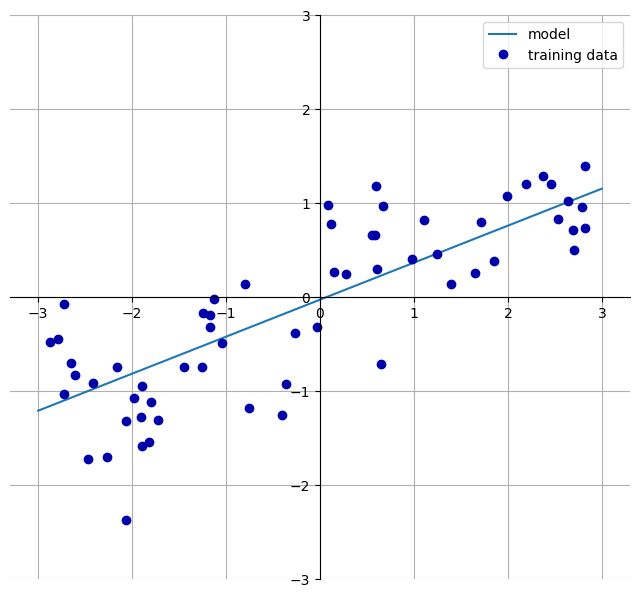

In [29]:
mglearn.plots.plot_linear_regression_wave()

**Linear regression aka ordinary least squares**

In [50]:
from sklearn.linear_model import LinearRegression

# Generate the wave dataset with 60 samples
X, y = mglearn.datasets.make_wave(n_samples=60)
# Split the data into training and test sets with a random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate and fit the Linear Regression model
lr = LinearRegression().fit(X_train, y_train)

In [51]:
# Print the learned coefficient (slope)
print ("lr.coef_:", lr.coef_)
# Print the learned intercept (y-intercept)
print ("lr.intercept_:", lr.intercept_)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [52]:
# Evaluate the Linear Regression model on the training set using R^2 score
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
# Evaluate the Linear Regression model on the test set using R^2 score
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [53]:
# Load the extended Boston housing dataset
X, y = mglearn.datasets.load_extended_boston()

# Split the data into training and test sets with a random state of 0
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Instantiate and fit the Linear Regression model
lr = LinearRegression().fit(X_train, y_train)

In [54]:
# Evaluate the Linear Regression model on the training set using R^2 score
print('Training set score: {:.2f}'.format(lr.score(X_train, y_train)))
# Evaluate the Linear Regression model on the test set using R^2 score
print('Test set score: {:.2f}'.format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


# **Ridge regression**

In [55]:
from sklearn.linear_model import Ridge

# Instantiate and fit the Ridge regression model with default alpha (alpha=1.0)
ridge = Ridge().fit(X_train, y_train)
# Evaluate the Ridge model on the training set using R^2 score
print('Training set score: {:.2f}'.format(ridge.score(X_train, y_train)))
# Evaluate the Ridge model on the test set using R^2 score
print('Test set score: {:.2f}'.format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [56]:
# Instantiate and fit the Ridge regression model with alpha=10
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
# Evaluate the Ridge model with alpha=10 on the training set using R^2 score
print('Training set score: {:.2f}'.format(ridge10.score(X_train, y_train)))
# Evaluate the Ridge model with alpha=10 on the test set using R^2 score
print('Test set score: {:.2f}'.format(ridge10.score(X_test, y_test)))
#

Training set score: 0.79
Test set score: 0.64


In [57]:
# Instantiate and fit the Ridge regression model with alpha=0.1
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
# Evaluate the Ridge model with alpha=0.1 on the training set using R^2 score
print('Training set score: {:.2f}'.format(ridge01.score(X_train, y_train)))
# Evaluate the Ridge model with alpha=0.1 on the test set using R^2 score
print('Test set score: {:.2f}'.format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


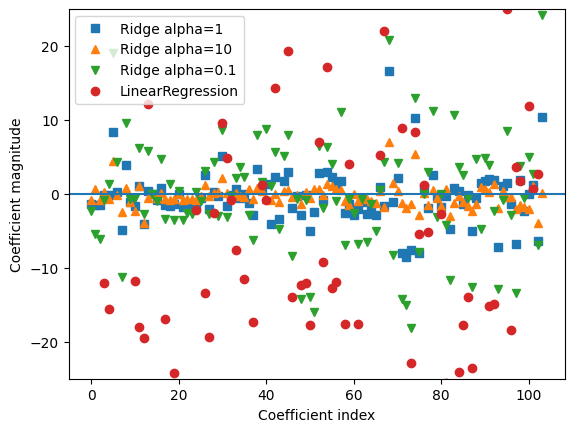

In [58]:
# Plot the coefficients for different Ridge alpha values and Linear Regression
plt.plot(ridge.coef_, 's', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'v', label='Ridge alpha=0.1')

plt.plot(lr.coef_, 'o', label='LinearRegression')
plt.xlabel('Coefficient index')
plt.ylabel('Coefficient magnitude')

# Set the x-axis limits based on the current plot
xlims = plt.xlim()
# Draw a horizontal line at y=0
plt.hlines(0, xlims[0], xlims[1])
# Set the x-axis limits back to the original values
plt.xlim(xlims)
# Set the y-axis limits
plt.ylim(-25, 25)
# Add a legend to the plot
plt.legend()

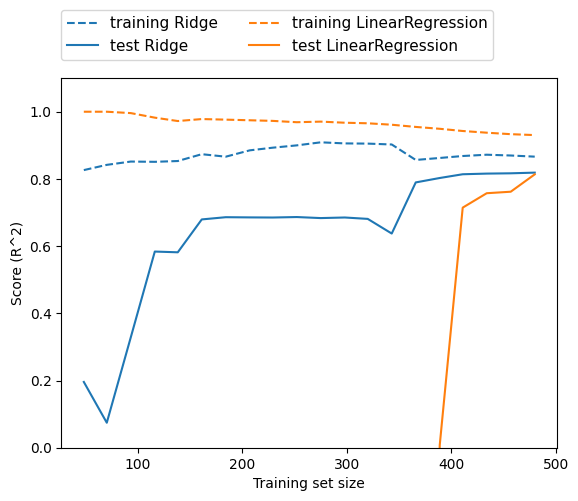

In [59]:
# Plot the effect of n_samples on Ridge regression
mglearn.plots.plot_ridge_n_samples()
#

# **Lasso**

In [60]:
from sklearn.linear_model import Lasso

# Instantiate and fit the Lasso regression model with default alpha (alpha=1.0)
lasso = Lasso().fit(X_train, y_train)
# Evaluate the Lasso model on the training set using R^2 score
print('Training set score: {:.2f}'.format(lasso.score(X_train, y_train)))
# Evaluate the Lasso model on the test set using R^2 score
print('Test set score: {:.2f}'.format(lasso.score(X_test, y_test)))
# Print the number of features used (non-zero coefficients)
print('Number of features used:', np.sum(lasso.coef_ != 0))
#

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [61]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.

# Instantiate and fit the Lasso regression model with alpha=0.01 and increased max_iter
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
# Evaluate the Lasso model with alpha=0.01 on the training set using R^2 score
print('Training set score: {:.2f}'.format(lasso001.score(X_train, y_train)))
# Evaluate the Lasso model with alpha=0.01 on the test set using R^2 score
print('Test set score: {:.2f}'.format(lasso001.score(X_test, y_test)))
# Print the number of features used (non-zero coefficients)
print('Number of features used:', np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [62]:
# Instantiate and fit the Lasso regression model with alpha=0.0001 and increased max_iter
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
# Evaluate the Lasso model with alpha=0.0001 on the training set using R^2 score
print('Training set score: {:.2f}'.format(lasso00001.score(X_train, y_train)))
# Evaluate the Lasso model with alpha=0.0001 on the test set using R^2 score
print('Test set score: {:.2f}'.format(lasso00001.score(X_test, y_test)))
# Print the number of features used (non-zero coefficients)
print('Number of features used:', np.sum(lasso00001.coef_ != 0))
#

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

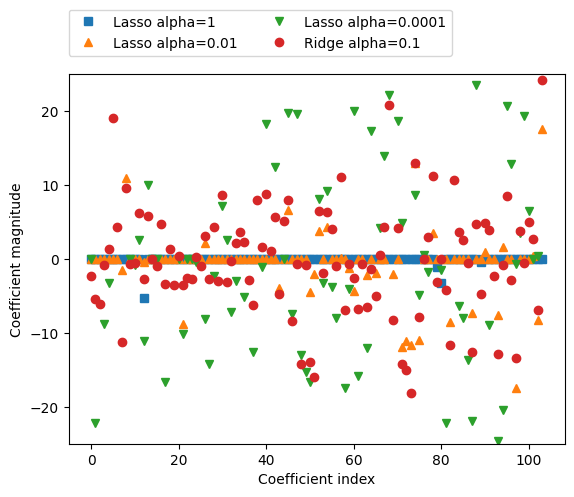

In [63]:
# Plot the coefficients for different Lasso alpha values and Ridge alpha=0.1
plt.plot(lasso.coef_, 's', label='Lasso alpha=1')
plt.plot(lasso001.coef_, '^', label='Lasso alpha=0.01')
plt.plot(lasso00001.coef_, 'v', label='Lasso alpha=0.0001')

plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
# Add a legend to the plot with 2 columns and adjusted location
plt.legend(ncol=2, loc=(0, 1.05))
# Set the y-axis limits
plt.ylim(-25, 25)
# Set the x-axis label
plt.xlabel('Coefficient index')
# Set the y-axis label
plt.ylabel('Coefficient magnitude')